<a href="https://colab.research.google.com/github/NIkson14/Study/blob/main/Analysis%20of%20Boston's%20Approved%20Building%20permits%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-posthocs


In [ ]:
import pandas as pd
import seaborn as sns  # for heatmap visualization
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn
from datetime import datetime, timedelta

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb
import geopandas as gpd
from shapely.geometry import Point


The combination of sq_feet, declared_valuation, city, permittype, issued_date, and expiration_date columns offers a rich dataset for various analyses. Here are some analysis ideas:

Time Series Analysis:

Explore the time series patterns of sq_feet and declared_valuation over the issued_date and expiration_date. You can create time series plots, identify trends, and look for seasonality.
Permit Duration:

Calculate the duration of each permit by subtracting issued_date from expiration_date. Analyze the distribution of permit durations and see if there are patterns related to city or permittype.
City-wise and Permit Type Analysis:

Group the data by city and permittype and analyze average sq_feet and declared_valuation for each combination. This can provide insights into how property characteristics vary across different types of permits in different cities.
Correlation Analysis:

Examine the correlation between sq_feet and declared_valuation. You can also check how the correlation changes over time or across different cities and permit types.
Outlier Detection:

Identify outliers or anomalies in sq_feet and declared_valuation for different time periods, cities, or permit types. Outliers could represent unique or unusual cases.
Time-to-Event Analysis:

Analyze the time it takes for permits to expire. You can calculate the time difference between issued_date and expiration_date and explore factors influencing the duration.
Seasonal Trends:

Explore seasonal trends in permit activity. Check if there are specific times of the year when there's a surge in permit applications or declared valuations.
Regression Analysis:

Conduct regression analysis with sq_feet as the independent variable and declared_valuation as the dependent variable. You can include additional factors like city or permittype to understand how they impact declared valuation.
Data Cleaning:

Check for missing values, inconsistencies, or errors in the data. Clean the data by handling missing values or addressing any data quality issues.
Visualizations:

Create visualizations such as heatmaps, scatter plots, or box plots to illustrate relationships between variables over time or across different categories.
Comparison of Expired and Active Permits:

Compare the characteristics of permits that have expired with those that are still active. This analysis can provide insights into differences between completed and ongoing projects


In [ ]:
# df = pd.read_csv("/content/tmp8hqkfq5z.csv")
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tmp8hqkfq5z.csv', sep=',')
df

<ipython-input-115-0da6860bc663>:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tmp8hqkfq5z.csv', sep=',')


,object_id,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,...,state,zip,property_id,parcel_id,gpsy,gpsx,geom_2249,lat,long,geom_4326
0,1,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,Patrick Sharkey,"$36,500.00",$390.00,2021-01-28 16:29:26+00,...,MA,2109.0,130392.0,3.038070e+08,2.956235e+06,777000.467775,0101000020C9080000014080EF50B6274128B89653E58D...,42.359190,-71.052924,0101000020E6100000A703291D63C351C074AD05ECF92D...
1,2,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,"$40,000.00",$429.00,2011-11-04 15:04:58+00,...,MA,2132.0,17268.0,2.012032e+09,2.920239e+06,751016.119559,0101000020C908000081DB363D50EB264164AA649F9747...,42.260750,-71.149611,0101000020E61000005F23793993C951C071ECAA3E6021...
2,3,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...,Jusimar Oliveria,"$5,000.00",$70.00,2020-06-01 18:08:47+00,...,MA,2129.0,113443.0,2.028370e+08,2.962078e+06,775710.380542,0101000020C90800007E6BD6C23CAC2741422F500F4F99...,42.375243,-71.057585,0101000020E6100000F053B47AAFC351C0A6BB62F20730...
3,4,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,"$74,295.75",$803.00,2019-11-13 18:38:56+00,...,MA,2118.0,129994.0,4.025580e+08,2.949423e+06,769648.312793,0101000020C9080000025726A0E07C274183505E499780...,42.340600,-71.080251,0101000020E6100000D72A24D322C551C044521DC4982B...
4,5,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,"$15,000.00",$206.00,2013-01-03 19:13:09+00,...,MA,2135.0,149852.0,2.204944e+09,2.950791e+06,749690.298790,0101000020C9080000FCFDFA98F4E02641F6694F594383...,42.344600,-71.154051,0101000020E61000009DED6FF7DBC951C0929A5BD71B2C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628535,628536,U49993435,OSEAT,Use of Premises,Outside Seating,Outdoor patio / amenity space for commercial o...,Christine McMahon,$0.00,$50.00,2019-09-25 15:36:11+00,...,MA,2108.0,154961.0,3.027170e+08,2.956658e+06,774864.862213,0101000020C9080000E1FB73B9A1A527413CEFEB2AB98E...,42.360383,-71.060818,0101000020E610000045AC6870E4C351C091F70404212E...
628536,628537,U49993492,TEMTRL,Use of Premises,Temporary Trailers,Temporary Construction Trailer at Herb Chamber...,Regina Olivieri,"$1,000.00",$53.00,2019-09-12 17:07:00+00,...,MA,2134.0,424193.0,2.101574e+09,2.952823e+06,756414.438107,0101000020C9080000368B4FE07C1527411B4085B53B87...,42.350100,-71.129145,0101000020E610000095B141EA43C851C0D3822F13D02C...
628537,628538,U4999352,DRIVE,Use of Premises,Driveway Installation,Owners would like to install a curb cut and a ...,Maria Dubrowski,"$2,700.00",$53.00,2012-05-30 18:28:59+00,...,MA,2130.0,24047.0,1.901861e+09,2.939398e+06,759722.466351,0101000020C90800008297C5EE542F274149BB93F2026D...,42.313220,-71.117131,0101000020E610000023E4AD117FC751C0F40E78941728...
628538,628539,U49996367,RESPAR,Use of Premises,Residential Parking,2 car parking,Cesar DaSilva,"$7,000.00",$56.00,2023-04-10 15:10:24+00,...,MA,2124.0,34863.0,1.701519e+09,2.931227e+06,771088.017082,0101000020C908000081F3BE08208827410818C4530D5D...,42.290650,-71.075261,0101000020E61000001485FC11D1C451C0AAF220013425...


In [ ]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628540 entries, 0 to 628539
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   object_id           628540 non-null  int64  
 1   permitnumber        628540 non-null  object 
 2   worktype            623984 non-null  object 
 3   permittypedescr     628540 non-null  object 
 4   description         623984 non-null  object 
 5   comments            628329 non-null  object 
 6   applicant           605220 non-null  object 
 7   declared_valuation  628540 non-null  object 
 8   total_fees          628540 non-null  object 
 9   issued_date         628540 non-null  object 
 10  expiration_date     603211 non-null  object 
 11  status              628540 non-null  object 
 12  owner               611717 non-null  object 
 13  occupancytype       608743 non-null  object 
 14  sq_feet             628540 non-null  float64
 15  address             628539 non-nul

object_id                 0
permitnumber              0
worktype               4556
permittypedescr           0
description            4556
comments                211
applicant             23320
declared_valuation        0
total_fees                0
issued_date               0
expiration_date       25329
status                    0
owner                 16823
occupancytype         19797
sq_feet                   0
address                   1
city                    214
state                     0
zip                     449
property_id           10781
parcel_id             16823
gpsy                  14541
gpsx                  14541
geom_2249             14541
lat                   14541
long                  14541
geom_4326             14541
dtype: int64

In [ ]:
# df.dropna(inplace=True)
# df.info()
df['expiration_date']

0         2021-07-28 04:00:00+00
1         2012-05-04 04:00:00+00
2                            NaN
3         2020-05-13 04:00:00+00
4         2013-07-03 04:00:00+00
                   ...          
628535    2020-03-25 04:00:00+00
628536    2020-03-12 04:00:00+00
628537    2012-11-30 05:00:00+00
628538    2023-10-10 04:00:00+00
628539    2021-03-17 04:00:00+00
Name: expiration_date, Length: 628540, dtype: object

In [ ]:
#to check trends in permits over time
df['issued_date'] = pd.to_datetime(df['issued_date'])
df['expiration_date'] = pd.to_datetime(df['expiration_date'])


In [ ]:
# Explore the time range of your dataset
print("Min Date:", df['issued_date'].min())
print("Max Date:", df['issued_date'].max())

print("Min Date:", df['expiration_date'].min())
print("Max Date:", df['expiration_date'].max())

Min Date: 2006-09-26 04:00:00+00:00
Max Date: 2023-12-02 11:16:28+00:00
Min Date: 1805-01-03 04:56:02+00:00
Max Date: 2024-06-07 04:00:00+00:00


In [ ]:
# Group by year and count the number of permits
permit_count_by_year = df.groupby(df['issued_date'].dt.year)['object_id'].count()



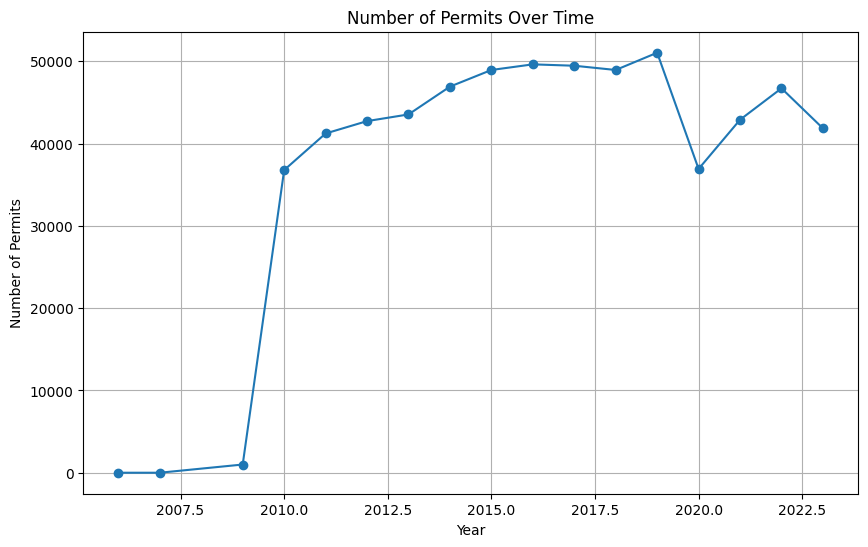

In [ ]:
# Plot the variation in the number of permits over time
plt.figure(figsize=(10, 6))
plt.plot(permit_count_by_year.index, permit_count_by_year.values, marker='o')
plt.title('Number of Permits Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Permits')
plt.grid(True)
plt.show()

In [ ]:
#to check trens in status of permits over time
print("Unique Status Values:", df['status'].unique())

Unique Status Values: ['Open' 'Closed' 'Stop Work' 'Issued']


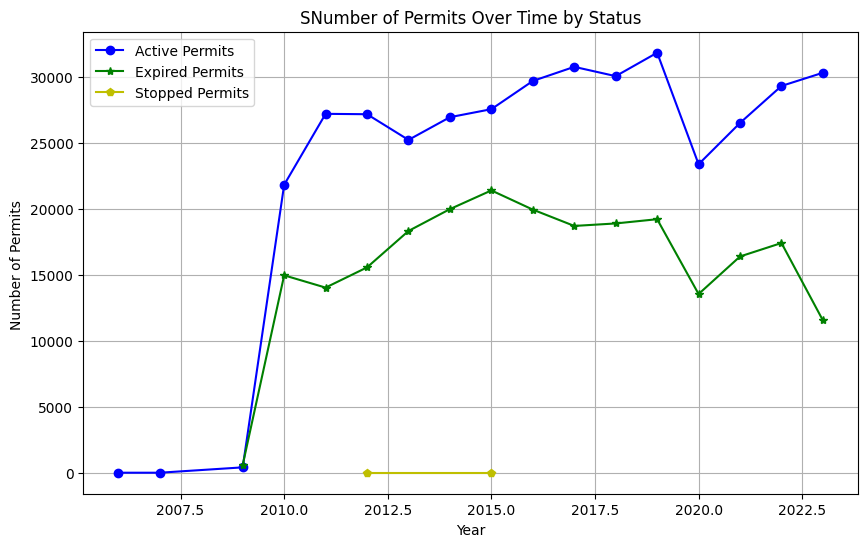

In [ ]:
# Filter open/active permits
active_permits = df[df['status'] == 'Open']

# Filter expired/clode permits
expired_permits = df[df['status'] == 'Closed']

# Filter open/active permits
issued_permits = df[df['status'] == 'Issued']

# Filter expired/clode permits
stopped_permits = df[df['status'] == 'Stop Work']

# Group by year and count the number of permits for active and expired permits
active_permit_count_by_year = active_permits.groupby(active_permits['issued_date'].dt.year)['object_id'].count()
expired_permit_count_by_year = expired_permits.groupby(expired_permits['issued_date'].dt.year)['object_id'].count()
issued_permits_count_by_year = issued_permits.groupby(issued_permits['issued_date'].dt.year)['object_id'].count()
stopped_permits_count_by_year = stopped_permits.groupby(stopped_permits['issued_date'].dt.year)['object_id'].count()


# Plot the variation in the number of permits over time for active and expired permits
plt.figure(figsize=(10, 6))
plt.plot(active_permit_count_by_year.index, active_permit_count_by_year.values, marker='o', color='b', label='Active Permits')
plt.plot(expired_permit_count_by_year.index, expired_permit_count_by_year.values, marker='*',color='g', label='Expired Permits')
plt.plot(stopped_permits_count_by_year.index, stopped_permits_count_by_year.values, marker='p',color='y', label='Stopped Permits')
plt.title('SNumber of Permits Over Time by Status')
plt.xlabel('Year')
plt.ylabel('Number of Permits ')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# to check the trend in permit types over time
print("Unique permit Values:", df['permittypedescr'].unique())

Unique permit Values: ['Amendment to a Long Form' 'Certificate of Occupancy'
 'Long Form/Alteration Permit' 'Electrical Permit'
 'Short Form Bldg Permit' 'Electrical Fire Alarms'
 'Electrical Low Voltage' 'Erect/New Construction'
 'Electrical Temporary Service' 'Excavation Permit' 'Gas Permit'
 'Plumbing Permit' 'Foundation Permit' 'Use of Premises']


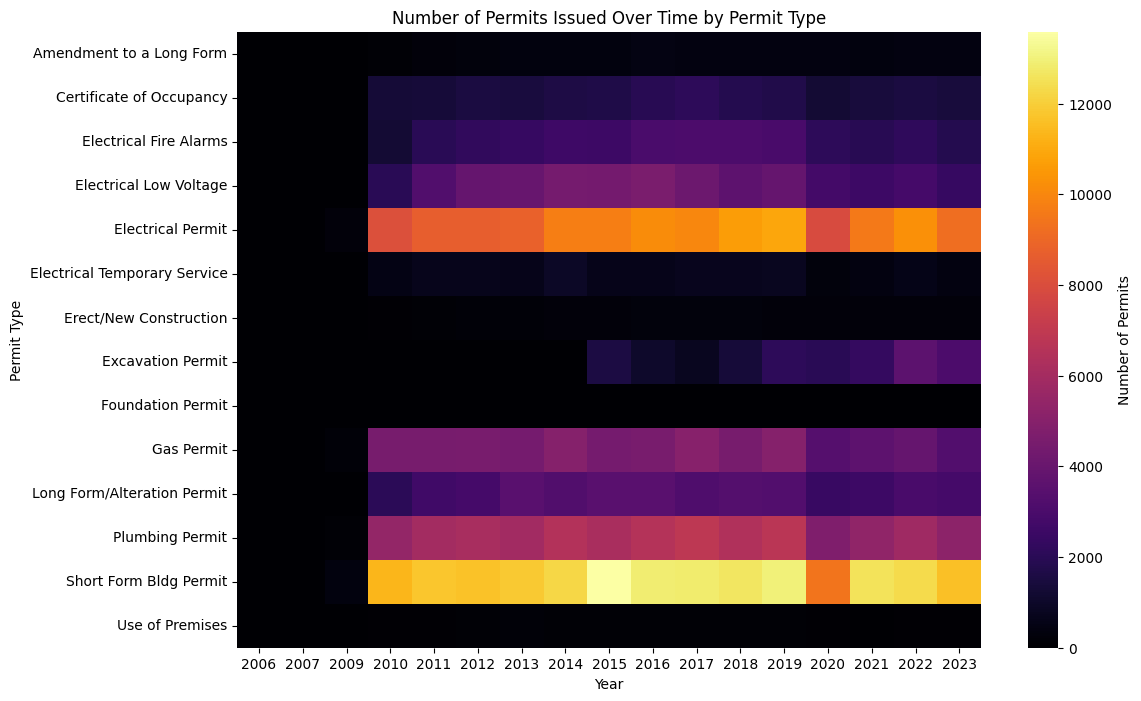

In [ ]:
# Assuming your DataFrame is named 'df'
# Convert date columns to datetime objects
df['issued_date'] = pd.to_datetime(df['issued_date'])

# Group by permit type and year, count the number of permits
permit_count_by_type_and_year = df.groupby(['permittypedescr', df['issued_date'].dt.year])['object_id'].count().reset_index()

# Create a pivot table
permit_count_pivot = permit_count_by_type_and_year.pivot_table(index='permittypedescr', columns='issued_date', values='object_id', fill_value=0)

# Plot a heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(permit_count_pivot, cmap='inferno', cbar_kws={'label': 'Number of Permits'})
plt.title('Number of Permits Issued Over Time by Permit Type')
plt.xlabel('Year')
plt.ylabel('Permit Type')
plt.show()

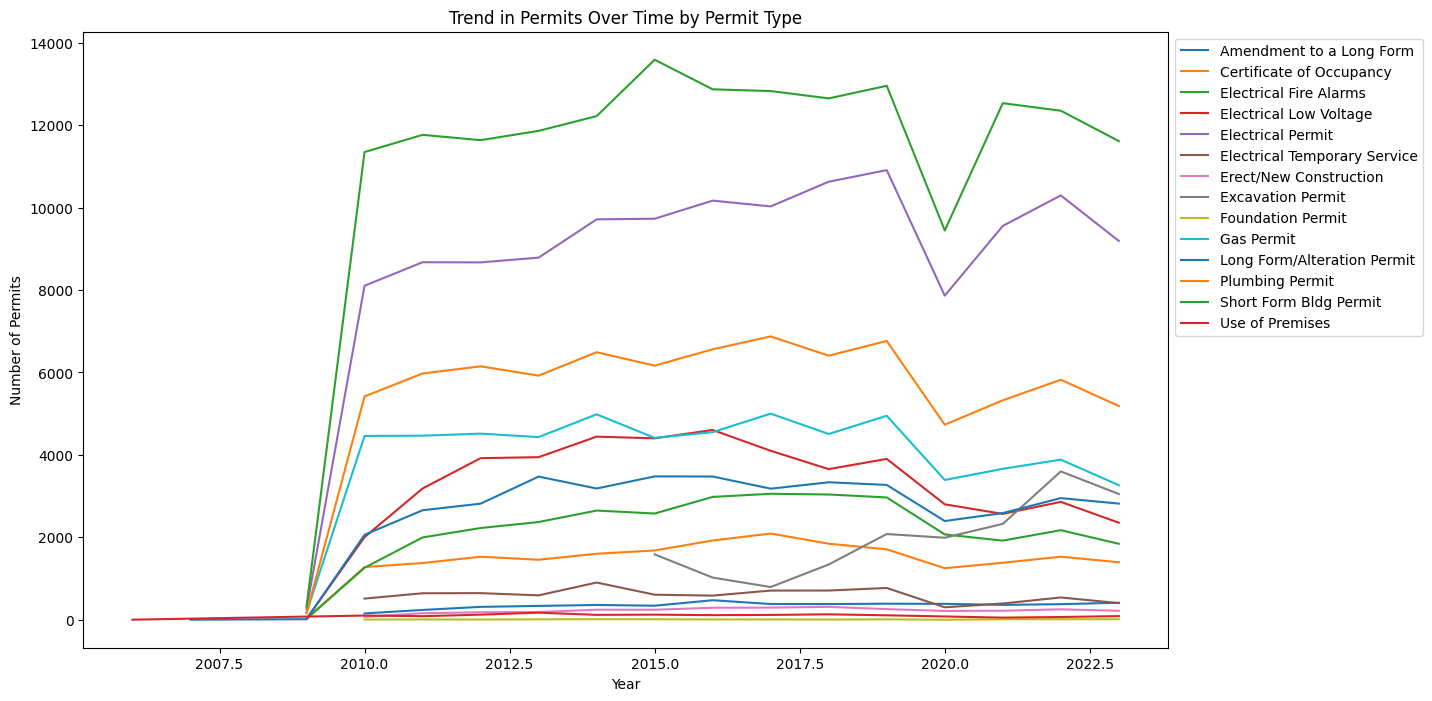

In [ ]:
# Assuming your DataFrame is named 'df'
# Convert date columns to datetime objects
# df['issued_date'] = pd.to_datetime(df['issued_date'])

# Group by permit type and year, count the number of permits
permit_count_by_type_and_year = df.groupby(['permittypedescr', df['issued_date'].dt.year])['object_id'].count().reset_index()

# Plotting the trend for each permit type
plt.figure(figsize=(14, 8))

# Iterate over unique permit types and plot a time series for each
for permit_type in permit_count_by_type_and_year['permittypedescr'].unique():
    subset = permit_count_by_type_and_year[permit_count_by_type_and_year['permittypedescr'] == permit_type]
    plt.plot(subset['issued_date'], subset['object_id'], label=permit_type)

# Set plot labels and title
plt.title('Trend in Permits Over Time by Permit Type')
plt.xlabel('Year')
plt.ylabel('Number of Permits')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
plt.show()


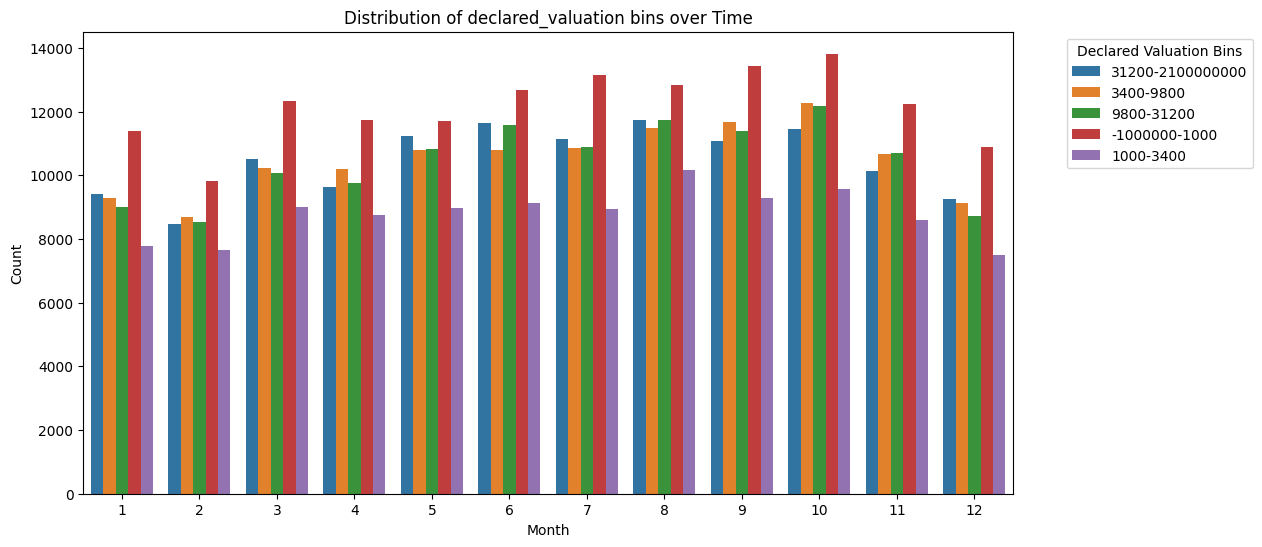

In [ ]:
# Assuming your data is stored in a DataFrame called 'df'
# Convert date columns to datetime format
# df['issued_date'] = pd.to_datetime(df['issued_date'])
df['expiration_date'] = pd.to_datetime(df['expiration_date'])

# # Set the issued_date as the index for time series analysis
# df.set_index('issued_date', inplace=True)

df['month'] = df.index.month

# Clean 'declared_valuation' column and convert to numeric
df['declared_valuation'] = pd.to_numeric(df['declared_valuation'].replace('[\$,]', '', regex=True), errors='coerce')

# Specify the number of bins for equal count distribution
num_bins = 5

# Use qcut to create bins with equal counts
df['declared_valuation_bin'], bins = pd.qcut(df['declared_valuation'], q=num_bins, labels=False, retbins=True, duplicates='drop')

# Create bin labels with range of values
bin_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(num_bins)]

# Map bin labels to the new column
df['declared_valuation_bin'] = df['declared_valuation_bin'].map(lambda x: bin_labels[x])

# Plot a bar chart for the distribution of 'declared_valuation_bin' over time
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='declared_valuation_bin', data=df, dodge=True)
plt.title('Distribution of declared_valuation bins over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Declared Valuation Bins', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [ ]:
# Assuming your DataFrame is called 'df'
min_valuation = df['declared_valuation'].min()
max_valuation = df['declared_valuation'].max()

print(f"Minimum Declared Valuation: {min_valuation}")
print(f"Maximum Declared Valuation: {max_valuation}")


Minimum Declared Valuation: -1000000.0
Maximum Declared Valuation: 2100000000.0


Overall Correlation: 0.00016671105167288548


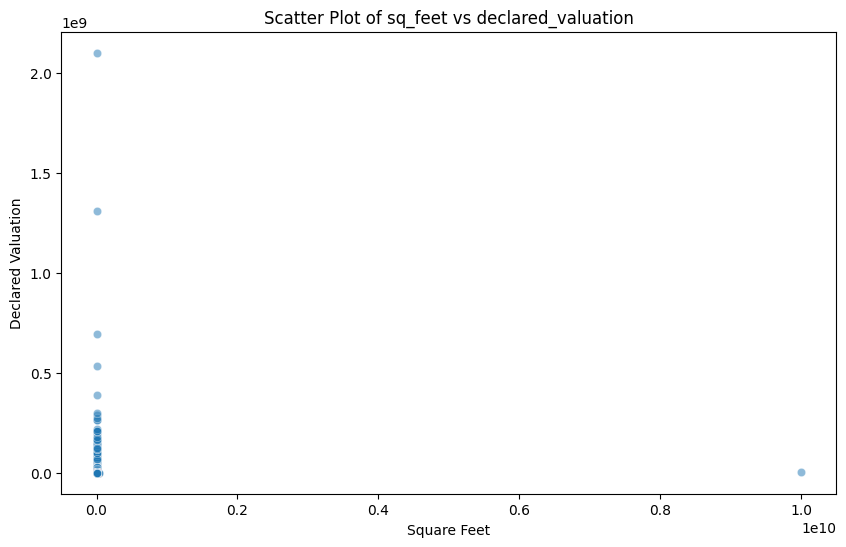

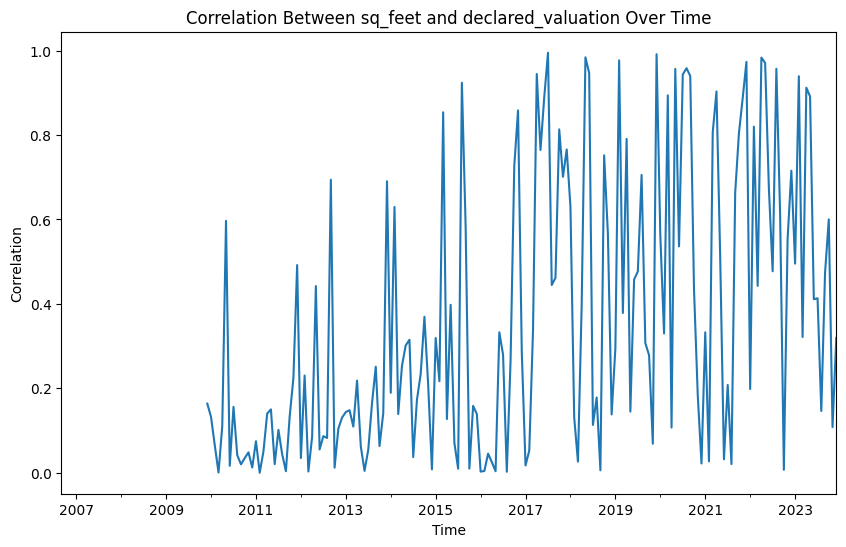

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


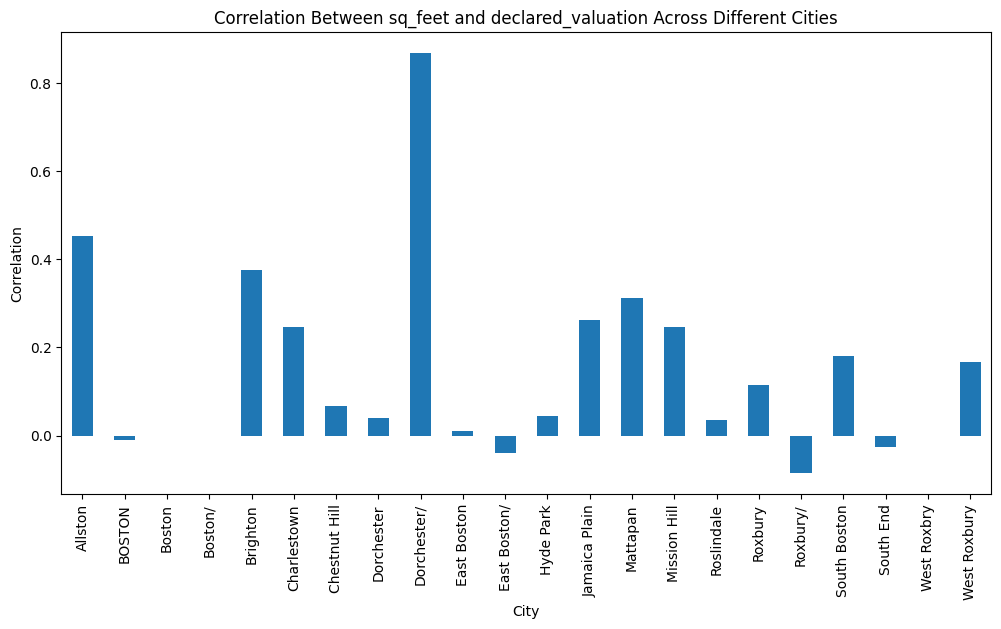

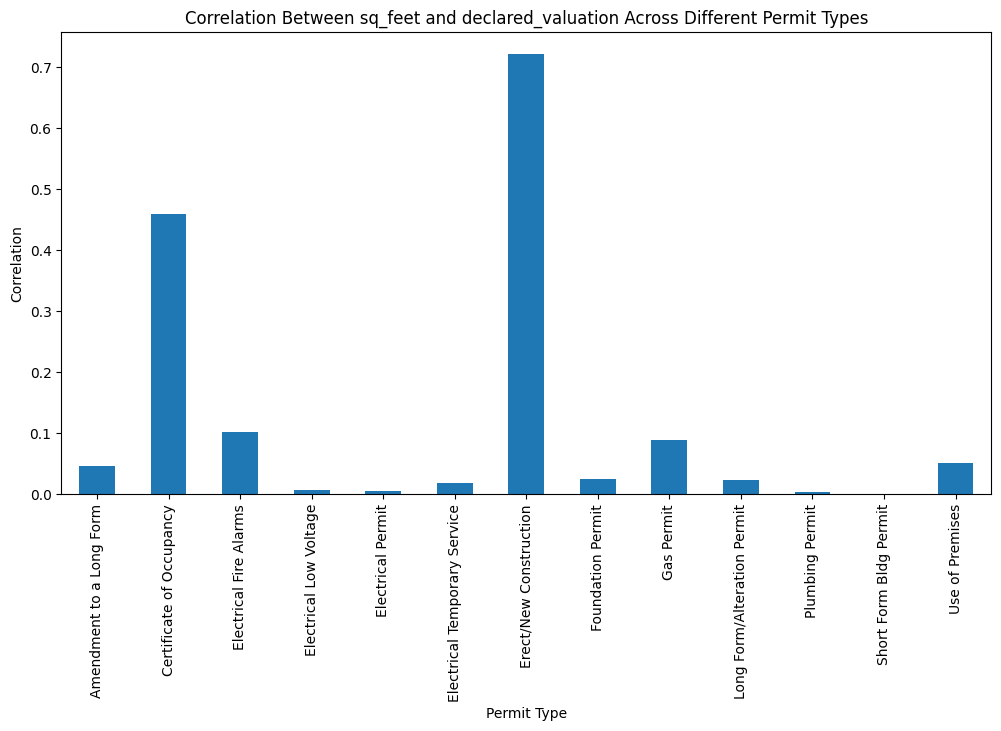

In [ ]:
# Examine overall correlation between 'sq_feet' and 'declared_valuation'

overall_corr = df['sq_feet'].corr(df['declared_valuation'])
print(f"Overall Correlation: {overall_corr}")

# Plot a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sq_feet', y='declared_valuation', data=df, alpha=0.5)
plt.title('Scatter Plot of sq_feet vs declared_valuation')
plt.xlabel('Square Feet')
plt.ylabel('Declared Valuation')
plt.show()

# Examine correlation over time
corr_over_time = df.resample('M').apply(lambda x: x['sq_feet'].corr(x['declared_valuation']))
corr_over_time.plot(figsize=(10, 6))
plt.title('Correlation Between sq_feet and declared_valuation Over Time')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.show()

# Examine correlation across different cities
corr_by_city = df.groupby('city').apply(lambda x: x['sq_feet'].corr(x['declared_valuation']))
corr_by_city.plot(kind='bar', figsize=(12, 6))
plt.title('Correlation Between sq_feet and declared_valuation Across Different Cities')
plt.xlabel('City')
plt.ylabel('Correlation')
plt.show()

# Examine correlation across different permit types
corr_by_permit_type = df.groupby('permittypedescr').apply(lambda x: x['sq_feet'].corr(x['declared_valuation']))
corr_by_permit_type.plot(kind='bar', figsize=(12, 6))
plt.title('Correlation Between sq_feet and declared_valuation Across Different Permit Types')
plt.xlabel('Permit Type')
plt.ylabel('Correlation')
plt.show()

<ipython-input-113-e71e4f4ec5c6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample('M').mean()


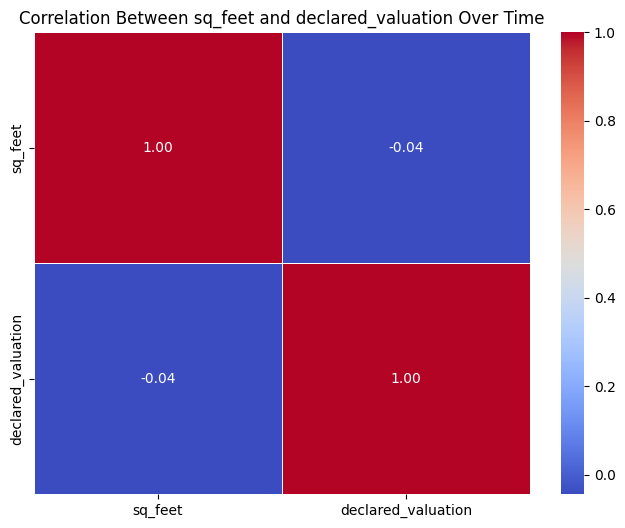

In [ ]:
# Resample the DataFrame to monthly frequency
df_resampled = df.resample('M').mean()

# Calculate the correlation matrix
corr_matrix = df_resampled[['sq_feet', 'declared_valuation']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Between sq_feet and declared_valuation Over Time')
plt.show()


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tmp8hqkfq5z.csv', sep=',')
df1.dropna()


# Print the head of the DataFrame to inspect the data
# print(df1.head())

# Check data types and missing values


# Convert date columns to datetime
df1['issued_date'] = pd.to_datetime(df1['issued_date'])
df1['expiration_date'] = pd.to_datetime(df1['expiration_date'], errors='coerce')

# Set 'issued_date' as the index
# df1.set_index('issued_date', inplace=True)
print(df1.info())

<ipython-input-17-22b4911bb724>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tmp8hqkfq5z.csv', sep=',')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628540 entries, 0 to 628539
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   object_id           628540 non-null  int64              
 1   permitnumber        628540 non-null  object             
 2   worktype            623984 non-null  object             
 3   permittypedescr     628540 non-null  object             
 4   description         623984 non-null  object             
 5   comments            628329 non-null  object             
 6   applicant           605220 non-null  object             
 7   declared_valuation  628540 non-null  object             
 8   total_fees          628540 non-null  object             
 9   issued_date         628540 non-null  datetime64[ns, UTC]
 10  expiration_date     603211 non-null  datetime64[ns, UTC]
 11  status              628540 non-null  object             
 12  owner           

In [ ]:
# df1.dropna()
df1.head()

,object_id,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,expiration_date,...,state,zip,property_id,parcel_id,gpsy,gpsx,geom_2249,lat,long,geom_4326
issued_date,,,,,,,,,,,,,,,,,,,,,
2021-01-28 16:29:26+00:00,1,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,Patrick Sharkey,"$36,500.00",$390.00,2021-07-28 04:00:00+00:00,...,MA,2109.0,130392.0,3.038070e+08,2.956235e+06,777000.467775,0101000020C9080000014080EF50B6274128B89653E58D...,42.359190,-71.052924,0101000020E6100000A703291D63C351C074AD05ECF92D...
2011-11-04 15:04:58+00:00,2,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,"$40,000.00",$429.00,2012-05-04 04:00:00+00:00,...,MA,2132.0,17268.0,2.012032e+09,2.920239e+06,751016.119559,0101000020C908000081DB363D50EB264164AA649F9747...,42.260750,-71.149611,0101000020E61000005F23793993C951C071ECAA3E6021...
2020-06-01 18:08:47+00:00,3,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...,Jusimar Oliveria,"$5,000.00",$70.00,NaT,...,MA,2129.0,113443.0,2.028370e+08,2.962078e+06,775710.380542,0101000020C90800007E6BD6C23CAC2741422F500F4F99...,42.375243,-71.057585,0101000020E6100000F053B47AAFC351C0A6BB62F20730...
2019-11-13 18:38:56+00:00,4,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,"$74,295.75",$803.00,2020-05-13 04:00:00+00:00,...,MA,2118.0,129994.0,4.025580e+08,2.949423e+06,769648.312793,0101000020C9080000025726A0E07C274183505E499780...,42.340600,-71.080251,0101000020E6100000D72A24D322C551C044521DC4982B...
2013-01-03 19:13:09+00:00,5,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,"$15,000.00",$206.00,2013-07-03 04:00:00+00:00,...,MA,2135.0,149852.0,2.204944e+09,2.950791e+06,749690.298790,0101000020C9080000FCFDFA98F4E02641F6694F594383...,42.344600,-71.154051,0101000020E61000009DED6FF7DBC951C0929A5BD71B2C...


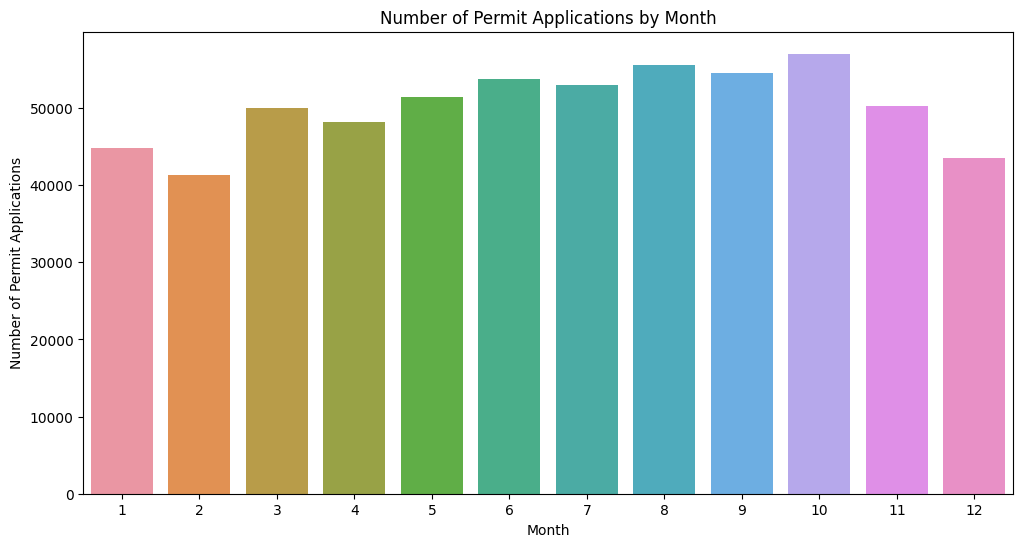

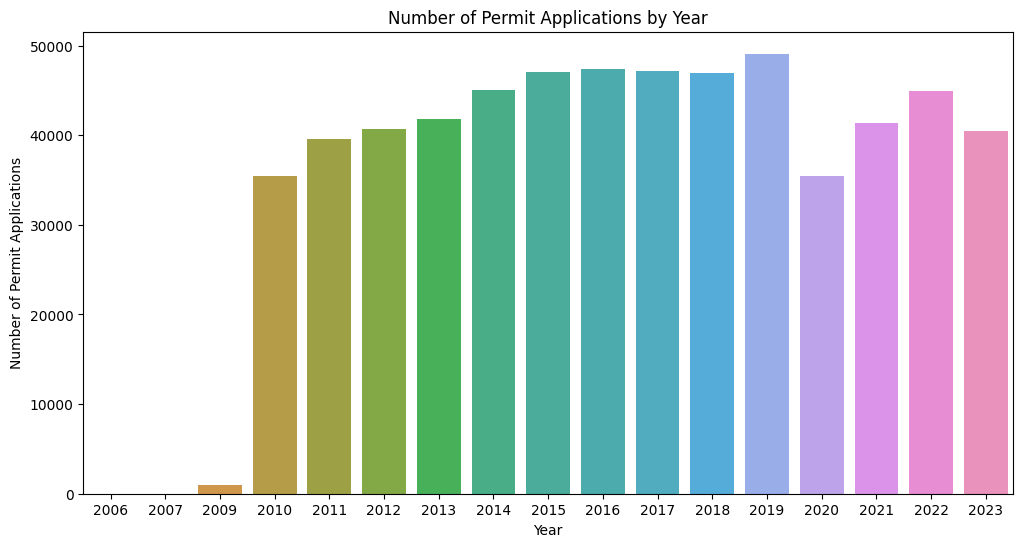

In [ ]:

# Assuming df1 is your DataFrame with 'issued_date' and 'declared_valuation' columns
# Convert 'issued_date' to datetime if not already
# df1['issued_date'] = pd.to_datetime(df1['issued_date'])

# Extract month and year from 'issued_date'
df1['issued_month'] = df1.index.month
df1['issued_year'] = df1.index.year

# Plot the number of permit applications per month
plt.figure(figsize=(12, 6))
sns.countplot(x='issued_month', data=df1)
plt.title('Number of Permit Applications by Month')
plt.xlabel('Month')
plt.ylabel('Number of Permit Applications')
plt.show()

# # Plot the declared valuations per month
# plt.figure(figsize=(12, 6))
# sns.barplot(x='issued_month', y='declared_valuation', data=df1, estimator=sum)
# plt.title('Total Declared Valuations by Month')
# plt.xlabel('Month')
# plt.ylabel('Total Declared Valuation')
# plt.show()

# df1['declared_valuation'] = pd.to_numeric(df1['declared_valuation'], errors='coerce')

# plt.figure(figsize=(12, 6))
# df1.groupby('issued_month')['declared_valuation'].sum().plot(kind='bar')
# plt.title('Total Declared Valuations by Month')
# plt.xlabel('Month')
# plt.ylabel('Total Declared Valuation')
# plt.show()

# You can also create plots for each year to observe trends over different years

# Plot the number of permit applications per year
plt.figure(figsize=(12, 6))
sns.countplot(x='issued_year', data=df1)
plt.title('Number of Permit Applications by Year')
plt.xlabel('Year')
plt.ylabel('Number of Permit Applications')
plt.show()

# # Plot the total declared valuations per year
# plt.figure(figsize=(12, 6))
# sns.barplot(x='issued_year', y='declared_valuation', data=df1, estimator=sum)
# plt.title('Total Declared Valuations by Year')
# plt.xlabel('Year')
# plt.ylabel('Total Declared Valuation')
# plt.show()


In [ ]:
# Assuming 'sq_feet' and 'total_fees' are columns in your DataFrame
# You may need to preprocess the data and handle missing values accordingly

# Define chunksize
chunksize = 50000

# Determine the number of chunks
num_chunks = len(df1) // chunksize + 1

# Initialize an empty DataFrame for the regression results
results = pd.DataFrame()
for i in range(num_chunks):
    # Select a chunk of data
    start_idx = i * chunksize
    end_idx = (i + 1) * chunksize
    chunk = df1.iloc[start_idx:end_idx]

    # Drop rows with missing values in key columns
    df_regression = chunk[['sq_feet', 'total_fees', 'city']].dropna()

    # Convert 'total_fees' to numeric, handling strings like '$390.00'
    # Clean 'total_fees' column: remove dollar signs, commas, and convert to numeric
    df_regression['total_fees'] = pd.to_numeric(df_regression['total_fees'].str.replace('[\$,]', '', regex=True), errors='coerce')

    # Convert 'sq_feet' to numeric
    df_regression['sq_feet'] = pd.to_numeric(df_regression['sq_feet'], errors='coerce')

    # Clean up city names (remove leading/trailing spaces and convert to lowercase)
    df_regression['city'] = df_regression['city'].str.strip().str.lower()

    try:
        # Label encode the 'city' column
        df_regression['city_encoded'] = pd.factorize(df_regression['city'])[0]

        # Define independent variables (X) and the dependent variable (y)
        X = df_regression[['sq_feet', 'city_encoded']]
        y = df_regression['total_fees']

        # Add a constant to the independent variables
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X).fit()

        # Append results to the overall results DataFrame
        results = pd.concat([results, model.params.to_frame().T], ignore_index=True)

    except Exception as e:
        print(f"Error in chunk {i}: {e}")

# Display the final regression results
print(results)


           const       sq_feet  city_encoded
0   39842.278537  2.746381e-02  -2636.520758
1    1009.931501  7.182557e-02    -56.906978
2     180.537687  2.438243e-05     -0.285836
3     165.395736  2.674523e-04     -2.392015
4     232.380209  4.289677e-03     -3.426123
5    4328.379503  1.878017e+00    -32.940332
6    6067.718235  3.508598e-01   -394.216434
7      77.535120  1.785466e-03      2.177488
8      91.221065  6.956889e-04      1.314491
9     713.876900  2.234044e-04    -25.183243
10    640.657425  7.778539e-03    -25.475312
11   5989.103980 -4.788850e-07   -200.902472
12    443.427339  3.983655e-03      6.370818


Here's a breakdown of the output:

const: The intercept term in the regression equation.
sq_feet: The coefficient for the 'sq_feet' variable.
city_encoded: The coefficient for the encoded 'city' variable.
These coefficients represent the estimated impact of each variable on the 'total_fees' variable in your regression model.

In [ ]:
# Assuming 'results' is the DataFrame containing regression results

# Display the summary of the regression model
print(model.summary())

# Access the p-values of each coefficient
p_values = model.pvalues

# Print the p-values
print("\nP-values for each coefficient:")
print(p_values)

# Set the significance level (alpha)
alpha = 0.05

# Check significance
significant_coefficients = p_values[p_values < alpha]

# Print significant coefficients
print("\nSignificant coefficients:")
print(significant_coefficients)


                            OLS Regression Results                            
Dep. Variable:             total_fees   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     11.24
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           1.32e-05
Time:                        05:43:36   Log-Likelihood:            -2.6043e+05
No. Observations:               28537   AIC:                         5.209e+05
Df Residuals:                   28534   BIC:                         5.209e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          443.4273     23.091     19.203   

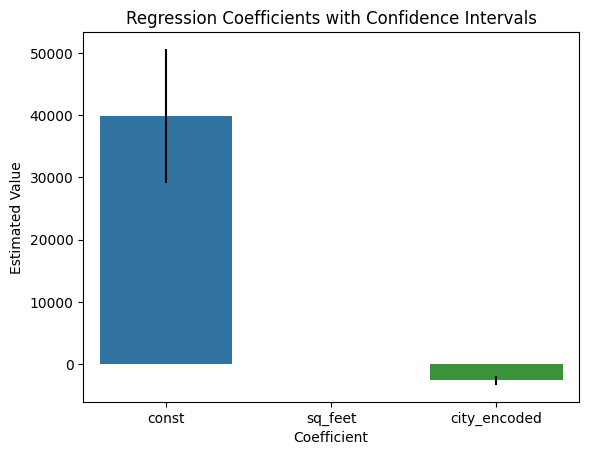

In [ ]:
# Assuming 'results' is the DataFrame containing regression results

# Plot coefficients and their confidence intervals
sns.barplot(x=results.columns, y=results.iloc[0], yerr=results.std(), capsize=0.2)

# Set plot labels and title
plt.xlabel('Coefficient')
plt.ylabel('Estimated Value')
plt.title('Regression Coefficients with Confidence Intervals')

# Show the plot
plt.show()


R-squared: 0.0007874568743490018
Adjusted R-squared: 0.0007174202483501979
Mean Squared Error (MSE): 4946396.278717584


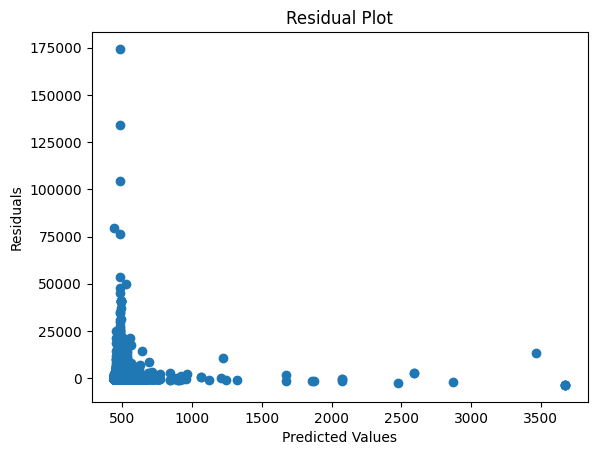

In [ ]:
# Assuming you have the original DataFrame 'df_regression' used for the regression analysis
# Define independent variables (X) and the dependent variable (y)
X = df_regression[['sq_feet', 'city_encoded']]
y = df_regression['total_fees']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get R-squared
r_squared = model.rsquared
print(f'R-squared: {r_squared}')

# Get adjusted R-squared
adj_r_squared = model.rsquared_adj
print(f'Adjusted R-squared: {adj_r_squared}')

# Get Mean Squared Error (MSE)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Plot residuals
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


Kruskal-Wallis Test Statistic: 12040.069970603545
P-value: 0.0
There is a significant difference between at least two years.

Dunn's Post-Hoc Test Results:
          2006          2009           2010           2011           2012  \
2006  1.000000  3.066304e-01   3.066304e-01   3.066304e-01   2.026615e-01   
2009  0.306630  1.000000e+00   1.000000e+00   3.066304e-01   4.947874e-06   
2010  0.306630  1.000000e+00   1.000000e+00   7.176014e-20  2.103644e-136   
2011  0.306630  3.066304e-01   7.176014e-20   1.000000e+00  4.664814e-276   
2012  0.202662  4.947874e-06  2.103644e-136  4.664814e-276   1.000000e+00   
2013  0.250999  1.764048e-02   7.786478e-61  1.268592e-160   2.848303e-17   
2014  0.273206  2.910049e-01   1.083725e-31  8.839509e-111   9.358969e-44   
2015  0.306630  1.000000e+00   1.748238e-01   2.055297e-36  8.749370e-124   
2016  0.306630  1.000000e+00   5.573085e-01   8.512406e-16  5.190762e-182   
2017  0.306630  1.837454e-01   4.361699e-33   3.066304e-01   0.000000e+00 

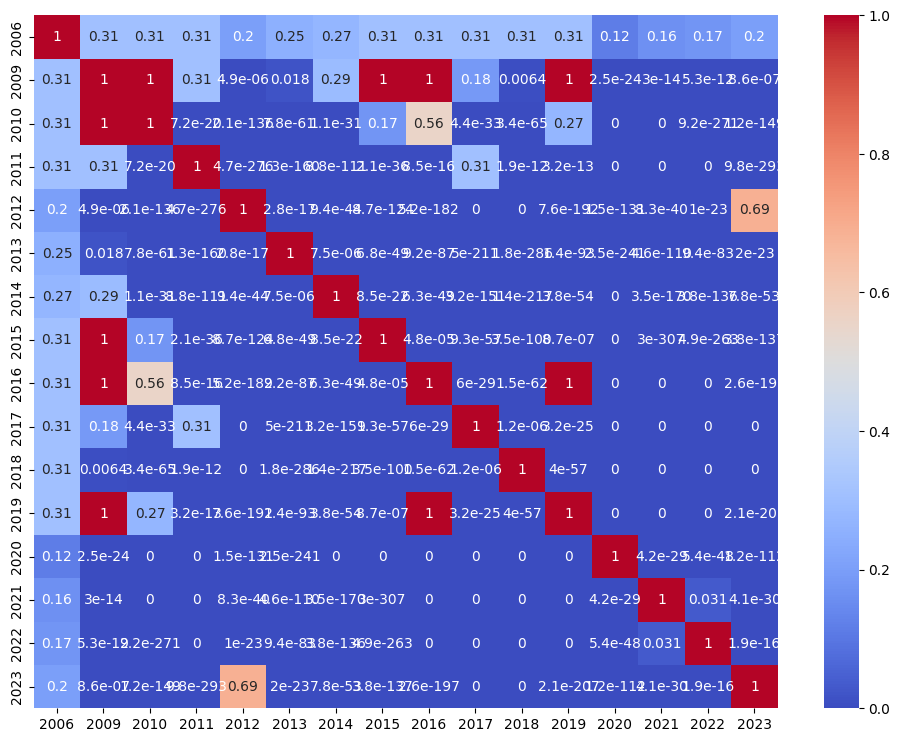

In [ ]:
# Assuming your DataFrame is named 'df'
# Convert date columns to datetime objects
df['issued_date'] = pd.to_datetime(df['issued_date'])

# Extract year from the 'issued_date' column
df['year'] = df['issued_date'].dt.year

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*[group for name, group in df.groupby('year')['permitnumber']])
print(f'Kruskal-Wallis Test Statistic: {statistic}')
print(f'P-value: {p_value}')

# Check if the p-value is below the significance level (e.g., 0.05)
if p_value < 0.05:
    print('There is a significant difference between at least two years.')

    # Perform Dunn's post-hoc test
    posthoc_results = posthoc_dunn(df, val_col='permitnumber', group_col='year', p_adjust='holm')
    print('\nDunn\'s Post-Hoc Test Results:')
    print(posthoc_results)

    # Visualize the results if needed
    import seaborn as sns
    plt.figure(figsize=(12, 9))
    sns.heatmap(posthoc_results, annot=True, cmap='coolwarm')
else:
    print('There is no significant difference between the years.')


In [ ]:
# Assuming df is your DataFrame
geometry = [Point(xy) for xy in zip(df1['long'], df1['lat'])]
gdf = gpd.GeoDataFrame(df1, geometry=geometry)

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<ipython-input-32-1902369eb8ba>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


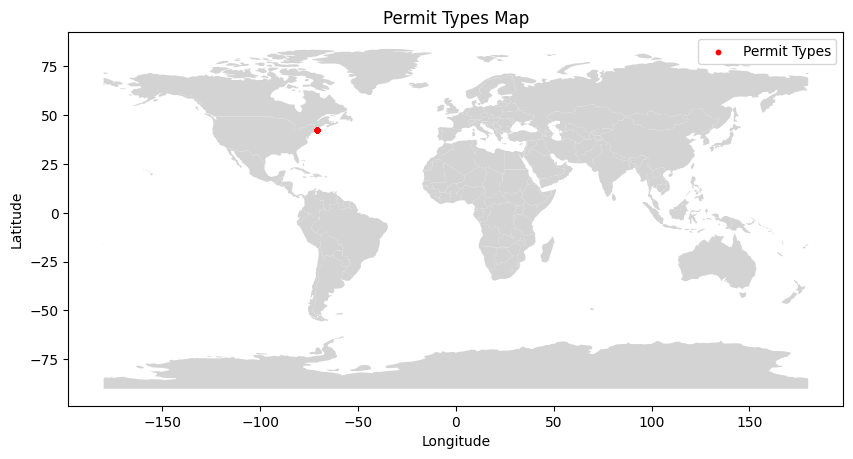

In [ ]:
# Plot basemap (optional)
world.plot(figsize=(10, 6), color='lightgray')

# Plot your data
gdf.plot(ax=plt.gca(), marker='o', color='red', markersize=10, label='Permit Types')

# Add legend and labels
plt.legend()
plt.title('Permit Types Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


In [ ]:
import plotly.express as px

# Assuming df1 is your DataFrame
fig = px.scatter_mapbox(
    df1.dropna(subset=['lat', 'long']),
    lat='lat',
    lon='long',
    hover_name='permittypedescr',
    zoom=10,
)

# Update the map layout
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=10,
    mapbox_center={"lat": df1['lat'].mean(), "lon": df1['long'].mean()},
)

# Show the figure
fig.show()


In [ ]:

from sklearn.preprocessing import LabelEncoder


# Replace NaN values in 'permittypedescr' and 'city' columns
df1['permittypedescr'].fillna('', inplace=True)
df1['city'].fillna('', inplace=True)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'permittypedescr' and 'city' columns
df1['permittypedescr_encoded'] = label_encoder.fit_transform(df1['permittypedescr'])
df1['city_encoded'] = label_encoder.fit_transform(df1['city'])

# Calculate the correlation
correlation = df1[['permittypedescr_encoded', 'city_encoded']].corr()

print(correlation)


                         permittypedescr_encoded  city_encoded
permittypedescr_encoded                 1.000000      0.120933
city_encoded                            0.120933      1.000000


In [ ]:
# Assuming df1 is your DataFrame
# Replace NaN values in 'declared_valuation' and 'city' columns
df1['declared_valuation'].fillna('$0', inplace=True)  # Replace NaN with '$0' or any other appropriate value
df1['city'].fillna('', inplace=True)

# Remove '$' symbols and convert 'declared_valuation' to numeric
df1['declared_valuation'] = pd.to_numeric(df1['declared_valuation'].replace('[\$,]', '', regex=True), errors='coerce')

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'city' column
df1['city_encoded'] = label_encoder.fit_transform(df1['city'])

# Calculate the correlation between 'declared_valuation' and 'city_encoded'
correlation = df1[['declared_valuation', 'city_encoded']].corr()

print(correlation)


                    declared_valuation  city_encoded
declared_valuation              1.0000       -0.0197
city_encoded                   -0.0197        1.0000


Declared Valuation vs. City Encoded:

Correlation Coefficient (-0.0197): This value is close to zero, indicating a weak linear relationship between declared_valuation and city_encoded.
Interpretation: There is a very weak negative correlation between the declared valuation and the encoded city. However, the correlation is close to zero, suggesting that there is not a strong linear relationship between these two variables.
Interpretation and Considerations:

Since the correlation is weak, you might not gain much predictive information by directly correlating these two variables.
It's essential to consider the nature of the data and the context of your analysis. Non-numeric variables like city might have complex relationships with numeric variables, and a simple correlation may not capture these nuances.

In [ ]:
# Calculate the time difference
df1['permit_duration'] = df1['expiration_date'] - df1.index

# Extract the duration in days as a new column
df1['permit_duration_days'] = df1['permit_duration'].dt.days

# Display the summary statistics of permit durations
print(df1['permit_duration_days'].describe())

# Explore factors influencing the duration (e.g., group by city)
average_duration_by_city = df1.groupby('city')['permit_duration_days'].mean()
print(average_duration_by_city)

# You can further visualize the results, plot histograms, or use statistical tests for more in-depth analysis.


count    603211.000000
mean        177.329140
std         110.004645
min      -79190.000000
25%         180.000000
50%         182.000000
75%         183.000000
max        3838.000000
Name: permit_duration_days, dtype: float64
city
                 160.916256
/                182.142857
ALLSTON          181.899281
Allston          175.634572
Allston/         181.647059
                    ...    
boston           182.538462
dorchester       181.000000
jamaica Plain     46.000000
roxbury          181.727273
south boston      15.000000
Name: permit_duration_days, Length: 136, dtype: float64


In [ ]:
df1.dropna(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556050 entries, 0 to 628539
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   object_id             556050 non-null  int64              
 1   permitnumber          556050 non-null  object             
 2   worktype              556050 non-null  object             
 3   permittypedescr       556050 non-null  object             
 4   description           556050 non-null  object             
 5   comments              556050 non-null  object             
 6   applicant             556050 non-null  object             
 7   declared_valuation    556050 non-null  object             
 8   total_fees            556050 non-null  object             
 9   issued_date           556050 non-null  datetime64[ns, UTC]
 10  expiration_date       556050 non-null  datetime64[ns, UTC]
 11  status                556050 non-null  object       

In [ ]:
from scipy.stats import levene

# Assuming 'df' is your DataFrame with columns 'permit_duration' and 'city'
grouped_data = [group['permit_duration'].dropna().dt.total_seconds() for name, group in df1.groupby('city')]

# Perform Levene's test
statistic, p_value = levene(*grouped_data)

# Print the results
print(f"Levene's Test - Statistic: {statistic}, p-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("The variances are significantly different among groups.")
else:
    print("There is no significant difference in variances among groups.")


Levene's Test - Statistic: 0.23013888651541856, p-value: 0.9999003149806265
There is no significant difference in variances among groups.


In [ ]:
from scipy.stats import anderson

# Create a list to store the results for each city
results = []

# Grouped data
grouped_data = [group['permit_duration'].dropna().dt.total_seconds() for name, group in df1.groupby('city')]

# Anderson-Darling test for each group
for data, city in zip(grouped_data, df1['city'].unique()):
    result = anderson(data)
    results.append((city, result.statistic, result.critical_values))

# Display results
for city, statistic, critical_values in results:
    print(f"City: {city}, Anderson-Darling Test Statistic: {statistic}, Critical Values: {critical_values}")


City: Boston, Anderson-Darling Test Statistic: 3493.1825633308235, Critical Values: [0.576 0.656 0.787 0.918 1.092]
City: West Roxbury, Anderson-Darling Test Statistic: 181.2832167304108, Critical Values: [0.572 0.652 0.782 0.912 1.085]
City: Roxbury, Anderson-Darling Test Statistic: 70105.80794376979, Critical Values: [0.576 0.656 0.787 0.918 1.092]
City: Allston, Anderson-Darling Test Statistic: nan, Critical Values: [-0.029 -0.033 -0.039 -0.046 -0.055]
City: Charlestown, Anderson-Darling Test Statistic: 7092.437166154239, Critical Values: [0.576 0.656 0.787 0.918 1.092]
City: East Boston, Anderson-Darling Test Statistic: 4825.00155863988, Critical Values: [0.576 0.656 0.787 0.918 1.092]
City: Dorchester, Anderson-Darling Test Statistic: 309.44951628810895, Critical Values: [0.574 0.654 0.785 0.915 1.089]
City: Hyde Park, Anderson-Darling Test Statistic: 28615.04049402394, Critical Values: [0.576 0.656 0.787 0.918 1.092]
City: Jamaica Plain, Anderson-Darling Test Statistic: 0.8366803

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:2121: RuntimeWarning: invalid value encountered in divide
  w = (y - xbar) / s


Boston, Roxbury, Charlestown, East Boston, Hyde Park, South Boston, Roslindale, Mission Hill, Mattapan, Chestnut Hill, Roxbury/, South End, Boston/, East Boston/: The Anderson-Darling test statistics are quite high, suggesting that the permit duration data for these cities deviate significantly from a normal distribution. The p-values are not provided directly, but you can infer non-normality from the high test statistics.

Allston, Dorchester, West Roxbury, Brighton, BOSTON, West Roxbry: The Anderson-Darling test statistics are relatively lower compared to the previous group, indicating less deviation from normality.

Jamaica Plain: The Anderson-Darling test statistic is low, suggesting that the permit duration data for this city is closer to a normal distribution.

Dorchester/: The Anderson-Darling test statistic is marked as 'nan,' and the critical values are negative. This might indicate an issue or lack of variation in the data, and it's advisable to investigate further.

Roxbury/: The Anderson-Darling test statistic is quite high, similar to Roxbury, suggesting non-normality.

In [ ]:
from scipy.stats import f_oneway, kruskal


# # Calculate the time difference
# df1['permit_duration'] = df1['expiration_date'] - df1.index

# # Extract the duration in days as a new column
# df1['permit_duration_days'] = df1['permit_duration'].dt.days

df1['permit_duration_days'] = (df1['expiration_date'] - df1['issued_date']).dt.days

# Print the DataFrame with the new 'permit_duration_days' column
print(df1[['issued_date', 'expiration_date', 'permit_duration_days']])

# Perform ANOVA test
anova_result = f_oneway(*[group['permit_duration_days'] for name, group in df1.groupby('city')])

# Perform Kruskal-Wallis test (non-parametric alternative to ANOVA)
kruskal_result = kruskal(*[group['permit_duration_days'] for name, group in df1.groupby('city')])

# Display the results
print("ANOVA p-value:", anova_result.pvalue)
print("Kruskal-Wallis p-value:", kruskal_result.pvalue)

# If p-value is less than your chosen significance level (e.g., 0.05), you can reject the null hypothesis
# This would suggest that there are significant differences in permit durations among cities.


                     issued_date           expiration_date  \
0      2021-01-28 16:29:26+00:00 2021-07-28 04:00:00+00:00   
1      2011-11-04 15:04:58+00:00 2012-05-04 04:00:00+00:00   
3      2019-11-13 18:38:56+00:00 2020-05-13 04:00:00+00:00   
5      2019-10-18 13:21:00+00:00 2020-04-18 04:00:00+00:00   
6      2019-11-12 16:00:03+00:00 2020-05-12 04:00:00+00:00   
...                          ...                       ...   
628535 2019-09-25 15:36:11+00:00 2020-03-25 04:00:00+00:00   
628536 2019-09-12 17:07:00+00:00 2020-03-12 04:00:00+00:00   
628537 2012-05-30 18:28:59+00:00 2012-11-30 05:00:00+00:00   
628538 2023-04-10 15:10:24+00:00 2023-10-10 04:00:00+00:00   
628539 2020-09-17 20:18:18+00:00 2021-03-17 04:00:00+00:00   

        permit_duration_days  
0                        180  
1                        181  
3                        181  
5                        182  
6                        181  
...                      ...  
628535                   181  
628536 

ANOVA p-value (0.9999489490831601):

Null Hypothesis (H0): There is no significant difference in permit durations among different groups (e.g., cities).
Since the p-value is very close to 1, you would fail to reject the null hypothesis. This suggests that there is no statistically significant difference in permit durations between groups.

Kruskal-Wallis p-value (1.953132724521017e-09):

Null Hypothesis (H0): There is no significant difference in permit durations among different groups.
A very low p-value (close to 0) indicates strong evidence against the null hypothesis. In this case, you would reject the null hypothesis, suggesting that there is a significant difference in permit durations between groups.
Given the conflicting results from ANOVA and Kruskal-Wallis, you might want to investigate further or consider the characteristics of your data. ANOVA assumes normality and homogeneity of variances, while Kruskal-Wallis is a non-parametric test that does not assume normality.

In [ ]:
# Assuming 'sq_feet' and 'total_fees' are columns in your DataFrame
# You may need to preprocess the data and handle missing values accordingly

# Define chunksize
chunksize = 50000

# Determine the number of chunks
num_chunks = len(df1) // chunksize + 1

# Initialize an empty DataFrame for the regression results
results = pd.DataFrame()

for i in range(num_chunks):
    # Select a chunk of data
    start_idx = i * chunksize
    end_idx = (i + 1) * chunksize
    chunk = df1.iloc[start_idx:end_idx]

    # Drop rows with missing values in key columns
    df_regression = chunk[['sq_feet', 'permittypedescr', 'city', 'total_fees']].dropna()

    # Convert 'total_fees' to numeric, handling strings like '$390.00'
    # Clean 'total_fees' column: remove dollar signs, commas, and convert to numeric
    df_regression['total_fees'] = pd.to_numeric(df_regression['total_fees'].str.replace('[\$,]', '', regex=True), errors='coerce')

    # Convert 'sq_feet' to numeric
    df_regression['sq_feet'] = pd.to_numeric(df_regression['sq_feet'], errors='coerce')

    # Clean up city names (remove leading/trailing spaces and convert to lowercase)
    df_regression['city'] = df_regression['city'].str.strip().str.lower()

    try:
        # One-hot encode the 'permittypedescr' column
        df_regression = pd.get_dummies(df_regression, columns=['permittypedescr'], prefix='permit_type')

        # Label encode the 'city' column
        df_regression['city_encoded'] = pd.factorize(df_regression['city'])[0]

        # Define independent variables (X) and the dependent variable (y)
        X = df_regression[['sq_feet', 'city_encoded'] + [col for col in df_regression.columns if 'permit_type' in col]]
        y = df_regression['total_fees']

        # Add a constant to the independent variables
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X).fit()

        # Append results to the overall results DataFrame
        results = pd.concat([results, model.params.to_frame().T], ignore_index=True)

    except Exception as e:
        print(f"Error in chunk {i}: {e}")

# Display the final regression results
print(results)

            const       sq_feet  city_encoded  \
0     4535.711471  1.600220e-02   -692.975527   
1             NaN  1.780530e-05     -6.573008   
2       73.464596  3.211141e-04      2.655646   
3      157.210395  1.944754e-03    -13.086260   
4    10196.239510  1.727425e+00   -395.244145   
5   336767.134071  2.394419e-01   -128.833647   
6       48.310994  2.903478e-05      3.326029   
7      215.271384  9.930441e-03     -5.417573   
8             NaN  1.840940e-04    -67.391626   
9             NaN  1.350946e-03    -47.557866   
10            NaN -2.516103e-07    466.243040   
11     263.820070  2.350032e-04    -32.492504   

    permit_type_Amendment to a Long Form  \
0                            4008.361444   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   
5                                    NaN   
6                                    NaN   
7         

In [ ]:
# Print unique values in 'total_fees' column for each chunk
for i in range(num_chunks):
    start_idx = i * chunksize
    end_idx = (i + 1) * chunksize
    chunk = df1.iloc[start_idx:end_idx]

    unique_values = chunk['total_fees'].unique()
    print(f"Chunk {i}: {unique_values}")


Chunk 0: ['$390.00' '$429.00' '$803.00' ... '$86.25' '$127.50' '$637.50']
Chunk 1: ['$70.00' '$3,720.00' '$80.00' ... '$739.00' '$506.00' '$8,205.00']
Chunk 2: ['$75.00' '$249.00' '$295.00' ... '$593.00' '$7,565.00' '$1,060.00']
Chunk 3: ['$24.00' '$49.00' '$29.00' '$32.00' '$43.00' '$53.00' '$33.00' '$96.00'
 '$76.00' '$39.00' '$75.00' '$85.00' '$98.00' '$1,183.00' '$72.00'
 '$30.00' '$22.00' '$110.00' '$70.00' '$66.00' '$54.00' '$60.00' '$80.00'
 '$220.00' '$130.00' '$55.00' '$574.00' '$320.00' '$170.00' '$91.00'
 '$50.00' '$92.00' '$334.00' '$125.00' '$90.00' '$120.00' '$194.00'
 '$250.00' '$95.00' '$360.00' '$52.00' '$107.00' '$88.00' '$71.00'
 '$420.00' '$560.00' '$27.00' '$78.00' '$26.00' '$45.00' '$40.00'
 '$260.00' '$69.00' '$35.00' '$25.00' '$715.00' '$135.00' '$21.00'
 '$102.00' '$166.00' '$67.00' '$57.00' '$59.00' '$141.00' '$31.00'
 '$370.00' '$140.00' '$87.00' '$115.00' '$503.00' '$48.00' '$750.00'
 '$490.00' '$34.00' '$58.00' '$46.00' '$36.00' '$28.00' '$119.00'
 '$500.00

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556050 entries, 0 to 628539
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   object_id             556050 non-null  int64              
 1   permitnumber          556050 non-null  object             
 2   worktype              556050 non-null  object             
 3   permittypedescr       556050 non-null  object             
 4   description           556050 non-null  object             
 5   comments              556050 non-null  object             
 6   applicant             556050 non-null  object             
 7   declared_valuation    556050 non-null  object             
 8   total_fees            556050 non-null  object             
 9   issued_date           556050 non-null  datetime64[ns, UTC]
 10  expiration_date       556050 non-null  datetime64[ns, UTC]
 11  status                556050 non-null  object       

In [ ]:
# Assuming 'results' is the DataFrame containing regression results

# Display the summary of the regression model
print(model.summary())

# Access the p-values of each coefficient
p_values = model.pvalues

# Print the p-values
print("\nP-values for each coefficient:")
print(p_values)

# Set the significance level (alpha)
alpha = 0.05

# Check significance
significant_coefficients = p_values[p_values < alpha]

# Print significant coefficients
print("\nSignificant coefficients:")
print(significant_coefficients)


                            OLS Regression Results                            
Dep. Variable:             total_fees   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     35.67
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           3.98e-16
Time:                        14:58:41   Log-Likelihood:                -50978.
No. Observations:                6050   AIC:                         1.020e+05
Df Residuals:                    6047   BIC:                         1.020e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          501.9869     21.851     22.973   